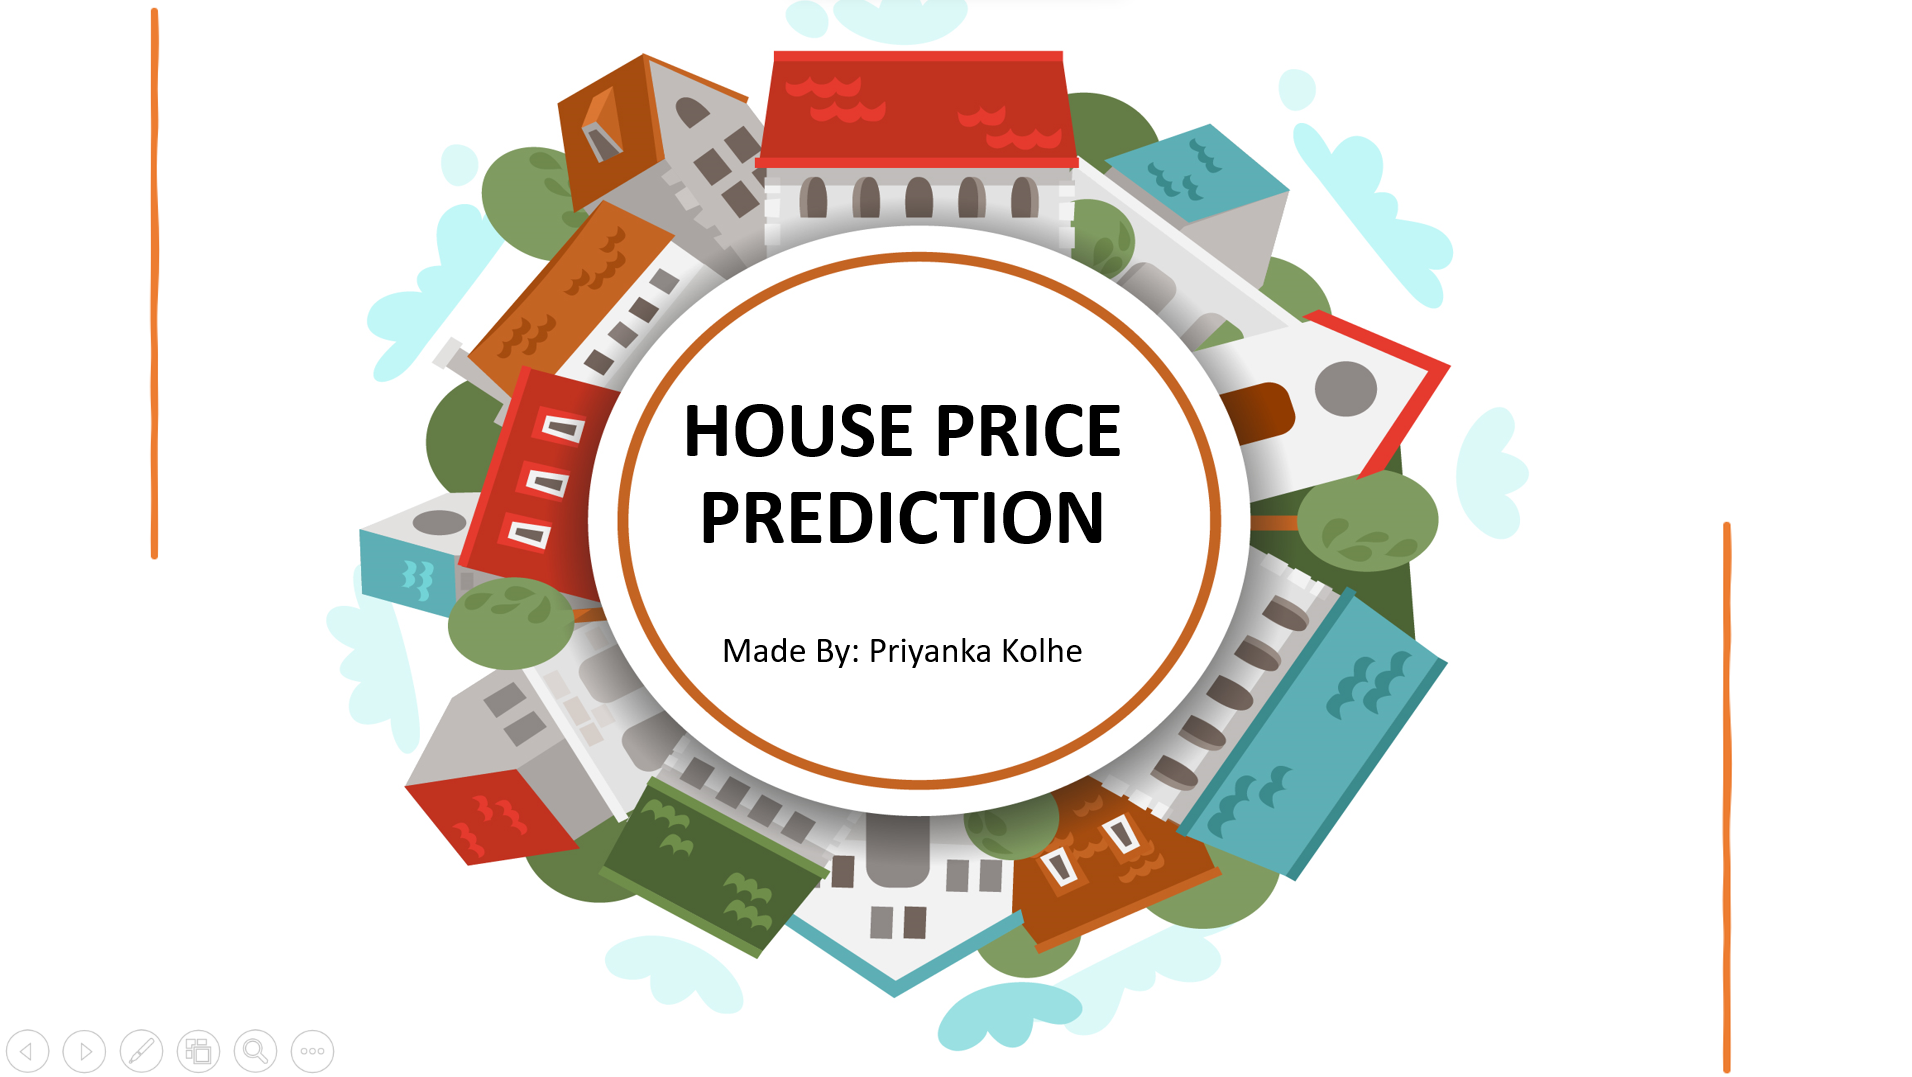

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
np.random.seed(501)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bengaluru_House_Data1.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
hs_df = df.copy()

In [6]:
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [7]:
hs_df.describe()

,bath,balcony
count,13247.000000,12711.000000
mean,2.692610,1.584376
std,1.341458,0.817263
min,1.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,40.000000,3.000000


## DATA CLEANING

> **LOCATION**

In [8]:
hs_df['location'].mode()[0]

'Whitefield'

In [9]:
hs_df['location'].fillna(hs_df['location'].mode()[0], inplace = True)

In [10]:
hs_df['location'].tolist()

['Electronic City Phase II',
 'Chikka Tirupathi',
 'Uttarahalli',
 'Lingadheeranahalli',
 'Kothanur',
 'Whitefield',
 'Old Airport Road',
 'Rajaji Nagar',
 'Marathahalli',
 'Gandhi Bazar',
 'Whitefield',
 'Whitefield',
 '7th Phase JP Nagar',
 'Gottigere',
 'Sarjapur',
 'Mysore Road',
 'Bisuvanahalli',
 'Raja Rajeshwari Nagar',
 'Ramakrishnappa Layout',
 'Manayata Tech Park',
 'Kengeri',
 'Binny Pete',
 'Thanisandra',
 'Bellandur',
 ' Thanisandra',
 'Mangammanapalya',
 'Electronic City',
 'Whitefield',
 'Ramagondanahalli',
 'Electronic City',
 'Yelahanka',
 'Bisuvanahalli',
 'Hebbal',
 'Raja Rajeshwari Nagar',
 'Kasturi Nagar',
 'Kanakpura Road',
 'Electronics City Phase 1',
 'Kundalahalli',
 'Chikkalasandra',
 'Uttarahalli',
 'Murugeshpalya',
 'Sarjapur  Road',
 'Ganga Nagar',
 'Yelahanka',
 'Kanakpura Road',
 'HSR Layout',
 'Doddathoguru',
 'Whitefield',
 'KR Puram',
 'Himagiri Meadows',
 'Adarsh Nagar',
 'Bhoganhalli',
 'Whitefield',
 'Lakshminarayana Pura',
 'Yelahanka',
 'Begur Roa

In [11]:
hs_df['location'] = hs_df['location'].apply(lambda x: x.strip())

In [12]:
hs_df['location']= hs_df['location'].str.lower()

def feature_value_count(x, y):
    location_df = pd.DataFrame(x.value_counts())
    location_df.reset_index(inplace = True)
    location_df.columns = [y, 'count']
    pd.set_option('display.max_rows',13000)
    return(location_df)

feature_value_count(hs_df['location'], 'location')

,location,count
0,whitefield,542
1,sarjapur road,399
2,electronic city,304
3,kanakpura road,273
4,thanisandra,237
5,yelahanka,213
6,uttarahalli,186
7,hebbal,177
8,marathahalli,175
9,raja rajeshwari nagar,171


In [13]:
def unique_count_counts():
    location_count = feature_value_count(hs_df['location'], 'location')
    location_count_df = pd.DataFrame(location_count['count'].value_counts())
    location_count_df.reset_index(inplace =True)
    location_count_df.columns = ['unique_count', 'counts']
    pd.set_option('display.max_rows',100)
    return(location_count_df.sort_values(by = 'unique_count'))

In [14]:
location_count_df = unique_count_counts()
location_count_df

,unique_count,counts
0,1,458
1,2,175
2,3,130
3,4,78
4,5,56
6,6,37
5,7,39
7,8,34
8,9,22
12,10,13


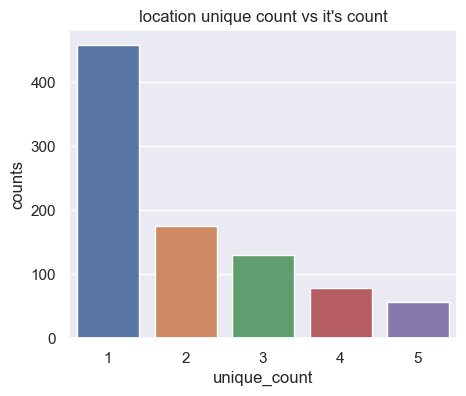

In [15]:
plt.figure(figsize =(5, 4), dpi = 100)
sns.barplot(x = location_count_df[location_count_df['unique_count'].isin([1,2,3,4,5])]['unique_count'], y ='counts', data=location_count_df )
plt.title("location unique count vs it's count")
plt.show()

In [16]:
def loc_single(x):
    count=0
    done =0
    print('*'*100)
    print(x)
    print('*'*100)
    for index, value in  enumerate (hs_df['location']):
        loc_split = value.split()
        if x in loc_split:
            count +=1
            print(value)

    print()    
    print('Total Count:', count, '\n')

In [17]:
loc_single('lakshmipura')

****************************************************************************************************
lakshmipura
****************************************************************************************************
lakshmipura
lakshmipura vidyaanyapura
lakshmipura
5 bedroom farm house in lakshmipura
lakshmipura

Total Count: 5 



In [18]:
location_corrections = ['jp', 'btm', 'hsr', 'jayanagar', 'hbr', 'judicial', 'koramangala', 'hrbr', 'indira', 'bommanahalli', 'beml', 'electronic', 'bel', 'whitefield', 'sarjapur', 'kogilu','hosur','banashankari','rmv', 'hal','ramamurthy', 'giri','mico','nagarbhavi','iti','bagalur']
locations_change = ['jp nagar', 'btm layout', 'hsr layout', 'jayanagar', 'hbr layout', 'judicial layout', 'koramangala', 'hrbr layout', 'indira nagar', 'bommanahalli', 'beml layout', 'electronic city', 'bel layout', 'whitefield', 'sarjapur road','kogilu','hosur road','banashankari','rmv','hal layout','ramamurthy nagar','giri nagar','mico layout','nagarbhavi','iti layout','bagalur','lakshmipura']

def location_corr(x):
    lst_index = 2
    while lst_index < len(location_corrections):
        count=0
        done =0
        print('*'*100)
        print(location_corrections[lst_index])
        print('*'*100)
        for index, value in  enumerate (hs_df['location']):
            loc_split = value.split()
            if location_corrections[lst_index] in loc_split:
                count +=1
                print(value)

        print()    
        print('Total Count:', count, '\n')
        lst_index=lst_index+1
    
location_corr(location_corrections)

****************************************************************************************************
hsr
****************************************************************************************************
hsr layout
hsr layout
sector 7 hsr layout
hsr layout
hsr layout
sector 6 hsr layout
sector 3 hsr layout
hsr layout
hsr layout
hsr layout
sector 1 hsr layout
sector 7 hsr layout
hsr layout
hsr layout
hsr layout
sector 7 hsr layout
hsr layout
sector 2 hsr layout
sector 2 hsr layout
sector 1 hsr layout
hsr layout
sector 6 hsr layout
hsr layout
sector 7 hsr layout
sector 4 hsr layout
hsr layout
sector 2 hsr layout
hsr layout
sector 7 hsr layout
sector 2 hsr layout
hsr layout
hsr layout
sector 2 hsr layout
sector 2 hsr layout
sector 7 hsr layout
hsr layout
hsr layout
sector 1 hsr layout
sector 6 hsr layout
sector 2 hsr layout
sector 7 hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
sector 7 hsr layout
hsr layout
hsr layout
sector 1 hsr layout
sector 1 hsr layout
sector 2 hsr layout

In [19]:
def location_change(location_corrections, locations_change):
    lst_index = 0
    while lst_index < len(location_corrections):
        count=0
        done =0
        for index, value in  enumerate (hs_df['location']):
            loc_split = value.split()
            if location_corrections[lst_index] in loc_split:
                count +=1
                hs_df['location'].iloc[index] = locations_change[lst_index]
                done+=1

        print()
        print('-'*100, '\n', location_corrections[lst_index], '\n','-'*100 )
        print('Total Count:', count, '\n')
        print('Total Count after Change:', done, '\n')
        lst_index=lst_index+1
    
location_change(location_corrections, locations_change)


---------------------------------------------------------------------------------------------------- 
 jp 
 ----------------------------------------------------------------------------------------------------
Total Count: 433 

Total Count after Change: 433 


---------------------------------------------------------------------------------------------------- 
 btm 
 ----------------------------------------------------------------------------------------------------
Total Count: 61 

Total Count after Change: 61 


---------------------------------------------------------------------------------------------------- 
 hsr 
 ----------------------------------------------------------------------------------------------------
Total Count: 100 

Total Count after Change: 100 


---------------------------------------------------------------------------------------------------- 
 jayanagar 
 ----------------------------------------------------------------------------------------------------


In [20]:
location_corr(location_corrections)

****************************************************************************************************
hsr
****************************************************************************************************
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hsr layout
hs

In [21]:
hs_df['location'].tolist()

['electronic city',
 'chikka tirupathi',
 'uttarahalli',
 'lingadheeranahalli',
 'kothanur',
 'whitefield',
 'old airport road',
 'rajaji nagar',
 'marathahalli',
 'gandhi bazar',
 'whitefield',
 'whitefield',
 'jp nagar',
 'gottigere',
 'sarjapur road',
 'mysore road',
 'bisuvanahalli',
 'raja rajeshwari nagar',
 'ramakrishnappa layout',
 'manayata tech park',
 'kengeri',
 'binny pete',
 'thanisandra',
 'bellandur',
 'thanisandra',
 'mangammanapalya',
 'electronic city',
 'whitefield',
 'ramagondanahalli',
 'electronic city',
 'yelahanka',
 'bisuvanahalli',
 'hebbal',
 'raja rajeshwari nagar',
 'kasturi nagar',
 'kanakpura road',
 'electronics city phase 1',
 'kundalahalli',
 'chikkalasandra',
 'uttarahalli',
 'murugeshpalya',
 'sarjapur road',
 'ganga nagar',
 'yelahanka',
 'kanakpura road',
 'hsr layout',
 'doddathoguru',
 'whitefield',
 'kr puram',
 'himagiri meadows',
 'adarsh nagar',
 'bhoganhalli',
 'whitefield',
 'lakshminarayana pura',
 'yelahanka',
 'begur road',
 'devanahall

In [22]:
# Location
lst = []
for index, value in enumerate(hs_df['location']):
    matches = re.finditer(r'[0-9]', value)
    
    for i in matches:
        lst.append(value)
        #print(value)
        
numeric_locations = set(lst)
numeric_locations


{'1 annasandrapalya',
 '1 immadihalli',
 '12th cross srinivas nagar banshankari 3rd stage',
 '1channasandra',
 '1hanuman nagar',
 '1hoysalanagar',
 '1kasavanhalli',
 '1st stage domlur',
 '1st stage radha krishna layout',
 '2 bedroom furnished farm house in kolar road',
 '2electronic city phase ii',
 '3rd stage raja rajeshwari nagar',
 '5 bedroom farm house in lakshmipura',
 '6th block rajaji nagar',
 'ananthanagar phase 1,electronic city , phase 2',
 'banashankari3rd stage bigbazar',
 'basnashankari,6th stage,',
 'bsk 6th stage 2ad block near sri conversation hall',
 'doddanakundi industrial area 2',
 'electronics city phase 1',
 'indranagar  100ft road defence colony',
 'j p nagar 7th phase ramayya city',
 'j.p.nagar 6th phase.sarakki nagar',
 'jay an agar 4 t block',
 'narayana nagar 1st block',
 'phase 1 kammasandra',
 'raja rajeshwari nagar 5th stage',
 'rk layout 2nd stage'}

In [23]:
loc_single('electronic')

****************************************************************************************************
electronic
****************************************************************************************************
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
electronic city
ele

In [24]:
hs_df[hs_df['location'] == 'jay an agar 4 t block']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8987,Plot Area,Ready To Move,jay an agar 4 t block,4 Bedroom,NaN,750,4.0,2.0,120


In [25]:
hs_df['location'].iloc[8987] = 'jayanagar'
hs_df['location'].iloc[8987]

'jayanagar'

In [26]:
hs_df[hs_df['location'] == 'j p nagar 7th phase ramayya city']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3172,Plot Area,Ready To Move,j p nagar 7th phase ramayya city,4 Bedroom,NaN,1200,4.0,2.0,350


In [27]:
hs_df['location'].iloc[3172] = 'jp nagar'
hs_df['location'].iloc[3172]

'jp nagar'

In [28]:
hs_df[hs_df['location'] == 'j.p.nagar 6th phase.sarakki nagar']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6419,Super built-up Area,19-Dec,j.p.nagar 6th phase.sarakki nagar,4 BHK,NaN,2690,4.0,2.0,185


In [29]:
hs_df['location'].iloc[6419] = 'jp nagar'
hs_df['location'].iloc[6419]

'jp nagar'

In [30]:
hs_df[hs_df['location'] == 'indiranagar hal 2nd stage']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [31]:
hs_df['location'].iloc[861] = 'indira nagar'
hs_df['location'].iloc[861]

'indira nagar'

In [32]:
hs_df[hs_df['location'] == 'indranagar  100ft road defence colony']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
4105,Super built-up Area,18-May,indranagar 100ft road defence colony,5 BHK,NaN,5800,5.0,NaN,80


In [33]:
hs_df['location'].iloc[4105] = 'indira nagar'
hs_df['location'].iloc[4105]

'indira nagar'

In [34]:
hs_df[hs_df['location'] == 'phase 1 kammasandra']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9155,Super built-up Area,18-May,phase 1 kammasandra,2 BHK,NaN,982,2.0,1.0,25
10258,Super built-up Area,18-Mar,phase 1 kammasandra,2 BHK,NaN,1105,2.0,2.0,28.18


In [35]:
hs_df['location'].iloc[10258] = 'electronics city phase 1'
hs_df['location'].iloc[10258]

'electronics city phase 1'

In [36]:
hs_df['location'].iloc[9155] = 'electronics city phase 1'
hs_df['location'].iloc[9155]

'electronics city phase 1'

In [37]:
hs_df[hs_df['location'] == '2electronic city phase ii']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1718,Super built-up Area,Ready To Move,2electronic city phase ii,27 BHK,NaN,8000,27.0,0.0,230


In [38]:
hs_df['location'].iloc[1718] = 'electronic city'
hs_df['location'].iloc[1718]

'electronic city'

In [39]:
hs_df[hs_df['location'] == 'ananthanagar phase 1,electronic city , phase 2']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5364,Built-up Area,Ready To Move,"ananthanagar phase 1,electronic city , phase 2",2 BHK,NaN,1016,2.0,1.0,45.9


In [40]:
hs_df['location'].iloc[5364] = 'electronic city'
hs_df['location'].iloc[5364]

'electronic city'

In [41]:
# Location
lst = []
for index, value in enumerate(hs_df['location']):
    matches = re.finditer(r'[0-9]', value)
    
    for i in matches:
        lst.append(value)
        #print(value)
        
numeric_locations = set(lst)
numeric_locations

{'1 annasandrapalya',
 '1 immadihalli',
 '12th cross srinivas nagar banshankari 3rd stage',
 '1channasandra',
 '1hanuman nagar',
 '1hoysalanagar',
 '1kasavanhalli',
 '1st stage domlur',
 '1st stage radha krishna layout',
 '2 bedroom furnished farm house in kolar road',
 '3rd stage raja rajeshwari nagar',
 '5 bedroom farm house in lakshmipura',
 '6th block rajaji nagar',
 'banashankari3rd stage bigbazar',
 'basnashankari,6th stage,',
 'bsk 6th stage 2ad block near sri conversation hall',
 'doddanakundi industrial area 2',
 'electronics city phase 1',
 'narayana nagar 1st block',
 'raja rajeshwari nagar 5th stage',
 'rk layout 2nd stage'}

In [42]:
hs_df[hs_df['location'] == 'basnashankari,6th stage,']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
4744,Plot Area,Ready To Move,"basnashankari,6th stage,",3 Bedroom,NaN,600,3.0,1.0,54


In [43]:
hs_df['location'].iloc[4744] = 'banashankari'
hs_df['location'].iloc[4744]

'banashankari'

In [44]:
feature_value_count(hs_df['location'], 'location')

,location,count
0,whitefield,544
1,sarjapur road,496
2,electronic city,444
3,jp nagar,435
4,kanakpura road,273
5,thanisandra,237
6,yelahanka,213
7,uttarahalli,186
8,hebbal,177
9,marathahalli,175


In [45]:
unique_count_counts()

,unique_count,counts
0,1,397
1,2,164
2,3,122
3,4,68
4,5,48
5,6,35
7,7,32
6,8,33
8,9,21
11,10,11


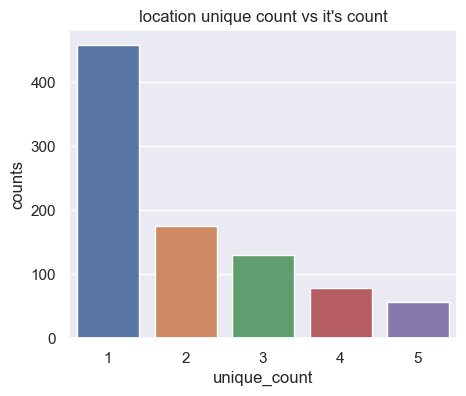

In [46]:
plt.figure(figsize =(5, 4), dpi = 100)
sns.barplot(x = location_count_df[location_count_df['unique_count'].isin([1,2,3,4,5])]['unique_count'], y ='counts', data=location_count_df )
plt.title("location unique count vs it's count")
plt.show()

**LOCATION TRANSFORMATION**

In [47]:
location_value_count = feature_value_count(hs_df['location'], 'location')

In [48]:
loc_count_less_ten = location_value_count[location_value_count['count'].isin([i for i in range(1,11)])]['location']

In [49]:
loc_count_less_ten

224                                          gunjur palya
225                                  nagappa reddy layout
226                                       nagadevanahalli
227                                           ganga nagar
228                                               kalkere
229                                       sadashiva nagar
230                                      dodsworth layout
231                                               bagalur
232                                          dairy circle
233                                              basapura
234                                         naganathapura
235                                      chennammana kere
236                                              ittamadu
237                                             mathikere
238                                         kamakshipalya
239                                        b narayanapura
240                                               ejipura
241           

In [50]:
for i in loc_count_less_ten:
    for index, value in enumerate(hs_df['location']):
        if i == value:
            hs_df.at[index, 'location'] = 'other'
            

In [51]:
feature_value_count(hs_df['location'], 'location')

,location,count
0,other,2600
1,whitefield,544
2,sarjapur road,496
3,electronic city,444
4,jp nagar,435
5,kanakpura road,273
6,thanisandra,237
7,yelahanka,213
8,uttarahalli,186
9,hebbal,177


> **TOTAL_SQFT**

In [52]:
print(set(hs_df['total_sqft'].tolist()))

{'4201', '1129', '1150', '3870', '1981', '4408', '2519', '2640', '1589', '1030', '2511', '1290', '1247', '505', '1249', '2121', '3855', '520', '947', '2875', '1423', '3190', '4360', '997', '1048', '1590', '500Sq. Yards', '1443', '1162', '1706', '2970', '1702', '2072', '1522', '4382', '5422', '20000', '1427', '3290', '1200 - 1470', '3012', '540', '1500Sq. Meter', '1254', '1506', '5656', '3504', '1580', '1225', '1700', '11000', '882', '1403', '361.33Sq. Yards', '3785', '1626', '1578', '2380', '8500', '590', '1153', '5480', '1853', '1070 - 1315', '6688', '3230', '1186', '3628', '2480', '704', '715', '1013', '1035', '1516', '1041', '981 - 1249', '1678', '706 - 716', '2223', '1650', '1180 - 1630', '1829', '1371', '2144', '1597', '4395', '735', '1792', '410', '695', '669', '1473', '1800', '2215', '1689', '790', '2095', '1816', '3554', '2120', '1763', '4850', '1015', '981', '539', '1653', '2127', '2440', '2955', '4550', '2160', '2825', '3530', '871', '1212', '1432', '1320', '1160 - 1315', '11

In [53]:
for index, value in enumerate(hs_df['total_sqft']):
    matches = re.finditer('-', value)

    for i in matches:
        #print(value)
        new_value = (float(re.split('\s-\s', value)[0])+float(re.split('\s-\s', value)[1]))/2
        #print(str(new_value))
        hs_df.at[index, 'total_sqft'] = str(new_value)

In [54]:
pat = r'\d+\.?\d*'
a=0
for index, value in enumerate(hs_df['total_sqft']):
    matches = re.finditer('[a-zA-Z]', value)

    for i in matches:
        print(value)
        a+=1
        #numerical_number = re.findall(pat, value)
        hs_df.at[index, 'total_sqft'] = np.nan
    print(a)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
34.46Sq. Meter
34.46Sq. Meter
34.46Sq. Meter
34.46Sq. Meter
34.46Sq. Meter
34.46Sq. Meter
34.46Sq. Meter
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7

In [55]:
hs_df['total_sqft'].isna().sum()

46

In [56]:
hs_df['total_sqft'] = hs_df['total_sqft'].astype('float')

In [57]:
hs_df['total_sqft'].fillna(hs_df['total_sqft'].median(),inplace =True)

> **PRICE**

In [58]:
set(hs_df['price'].tolist())

{'28.785',
 '  60.00',
 ' ? 135.00 ',
 '89.6',
 '54.27',
 '65.11',
 '97.5',
 '25.65',
 '1150',
 '51.42',
 ' ? 36.00 ',
 '65.99',
 '51.8',
 '185',
 '39.89',
 '34.63',
 '89.89',
 '43.6',
 '42.69',
 '520',
 '91.855',
 '38.3',
 '89.5',
 '43.63',
 '60.81',
 '53.27',
 '49.95',
 '69.45',
 '411',
 '56.25',
 '31.2',
 '37.83',
 '41.16',
 '22.34',
 '138',
 '31.9',
 '30.43',
 '44.81',
 '42.2',
 '14.04',
 '261',
 '263',
 '495',
 '44.96',
 '61.8',
 ' ? 34.00 ',
 '540',
 '27.25',
 '  90.00',
 '1700',
 '221',
 '80.58',
 ' ? 180.00 ',
 '43.48',
 '36.5',
 '44.55',
 '56.45',
 '252',
 '56.74',
 '60.98',
 '590',
 '64.08',
 '219',
 '32.64',
 '19.5',
 '40.95',
 '53.87',
 '196',
 '76.34',
 '  43.13',
 '33.82',
 '30.215',
 '70.39',
 ' $204.00 ',
 '62.82',
 '98.49',
 '79.8',
 '287',
 '70',
 '53.56',
 '430',
 '52.76',
 '56.41',
 '36.1',
 '147',
 '  109.00',
 '43.58',
 '74.31',
 ' ? 55.70 ',
 ' ? 89.00 ',
 '410',
 '120',
 '415',
 '1800',
 '69.09',
 '38.44',
 '  175.00',
 '75.885',
 '53.12',
 '57.95',
 '102.92',
 

In [59]:
for index, value in enumerate(hs_df['price']):
    matches = re.finditer('-', value)

    for i in matches:
        new_value = (float(value.split('-')[0]) + float(value.split('-')[1]))/2
        #print(new_value)
        hs_df.at[index, 'price'] = str(new_value)        

In [60]:
# To remove the special chracters ($, ?) and whitespace
def special_char_replace(value):
    new_value = value.replace('$','').replace('?', '').strip()
    return new_value

hs_df['price']=hs_df['price'].apply(special_char_replace)

In [61]:
hs_df['price'] = hs_df['price'].astype('float')

In [62]:
hs_df['price'].isna().sum()

0

In [63]:
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


> **SIZE**

In [64]:
set(hs_df['size'].tolist())

{'1 BHK',
 '1 Bedroom',
 '1 RK',
 '10 BHK',
 '10 Bedroom',
 '11 BHK',
 '11 Bedroom',
 '12 Bedroom',
 '13 BHK',
 '14 BHK',
 '16 BHK',
 '18 Bedroom',
 '19 BHK',
 '2 BHK',
 '2 Bedroom',
 '27 BHK',
 '3 BHK',
 '3 Bedroom',
 '4 BHK',
 '4 Bedroom',
 '43 Bedroom',
 '5 BHK',
 '5 Bedroom',
 '6 BHK',
 '6 Bedroom',
 '7 BHK',
 '7 Bedroom',
 '8 BHK',
 '8 Bedroom',
 '9 BHK',
 '9 Bedroom',
 nan}

In [65]:
hs_df['size'].fillna(hs_df['size'].mode()[0], inplace =True)

In [66]:
hs_df['size'] = hs_df['size'].apply(lambda x : x.replace('Bedroom','BHK'))
hs_df['size'] = hs_df['size'].apply(lambda x : x.replace(' BHK',''))
hs_df['size'] = hs_df['size'].apply(lambda x : x.replace(' RK',''))
hs_df['size'] = hs_df['size'].astype('int')

In [67]:
set(hs_df['size'].tolist())

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 27, 43}

> **BATH**

In [68]:
set(hs_df['bath'].tolist())

{nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 27.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 40.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [69]:
hs_df['bath'].isna().sum()

73

In [70]:
hs_df['bath'].fillna(hs_df['bath'].median(), inplace =True)

In [71]:
set(hs_df['bath'].tolist())

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 27.0,
 40.0}

> **BALCONY**

In [72]:
set(hs_df['balcony'].tolist())

{nan,
 0.0,
 1.0,
 nan,
 3.0,
 nan,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [73]:
hs_df['balcony'].isna().sum()

609

In [74]:
hs_df['balcony'].fillna(hs_df['balcony'].median(), inplace =True)

In [75]:
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  int32  
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 884.7+ KB


## DUPLICATE VALUES

In [76]:
# Duplicated values
print('Duplicate values:',hs_df.duplicated().sum())

# Drop duplicate values
hs_df.drop_duplicates(inplace = True)

print('After removal of duplicated values:',hs_df.duplicated().sum())

Duplicate values: 570
After removal of duplicated values: 0


## OUTLIER TREATMENT

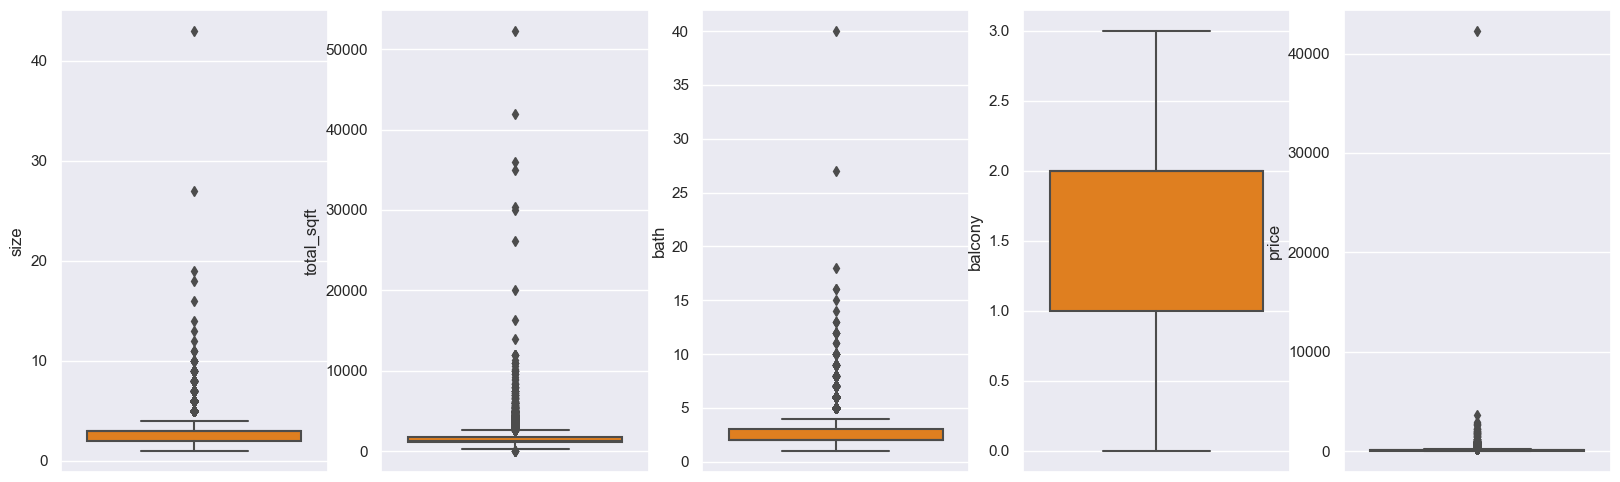

In [77]:
# Boxplot gist_yarg_r
plt.figure(figsize = (20, 6))
for i, col in enumerate (hs_df.select_dtypes(exclude = 'object').columns):
    plt.subplot(1,5,i+1)
    sns.boxplot(y = hs_df[col], palette = 'autumn_r' )
    
plt.show()

In [78]:
q1 = hs_df.quantile(0.25)
q3 = hs_df.quantile(0.75)
IQR = q3-q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

dict1 = {}
dict2 = {}
quant_list = []

dict1.update(upper_limit)
dict2.update(lower_limit)
quant_list.append(dict1)
quant_list.append(dict2)

limit = pd.DataFrame(quant_list).T
limit.columns = ['upper_limit', 'lower_limit']
limit


,upper_limit,lower_limit
size,4.5,0.5
total_sqft,2575.0,215.0
bath,4.5,0.5
balcony,3.5,-0.5
price,227.5,-56.5


In [79]:
hs_df['total_sqft'] = np.where(hs_df['total_sqft']>2545.0, 2545.0, np.where(hs_df['total_sqft']<233.0,233.0, hs_df['total_sqft']))

In [80]:
hs_df['price']=np.where(hs_df['price']>255.0, 255.0, hs_df['price'])

In [81]:
hs_df['balcony'] = np.where(hs_df['balcony']>3.5, 3 ,hs_df['balcony'] )

In [82]:
hs_df['bath'] = np.where(hs_df['bath']>4.5, 5 ,hs_df['bath'] )

In [83]:
hs_df['size'] = np.where(hs_df['size']>4.5, 5, hs_df['size'])

## ANALYSIS

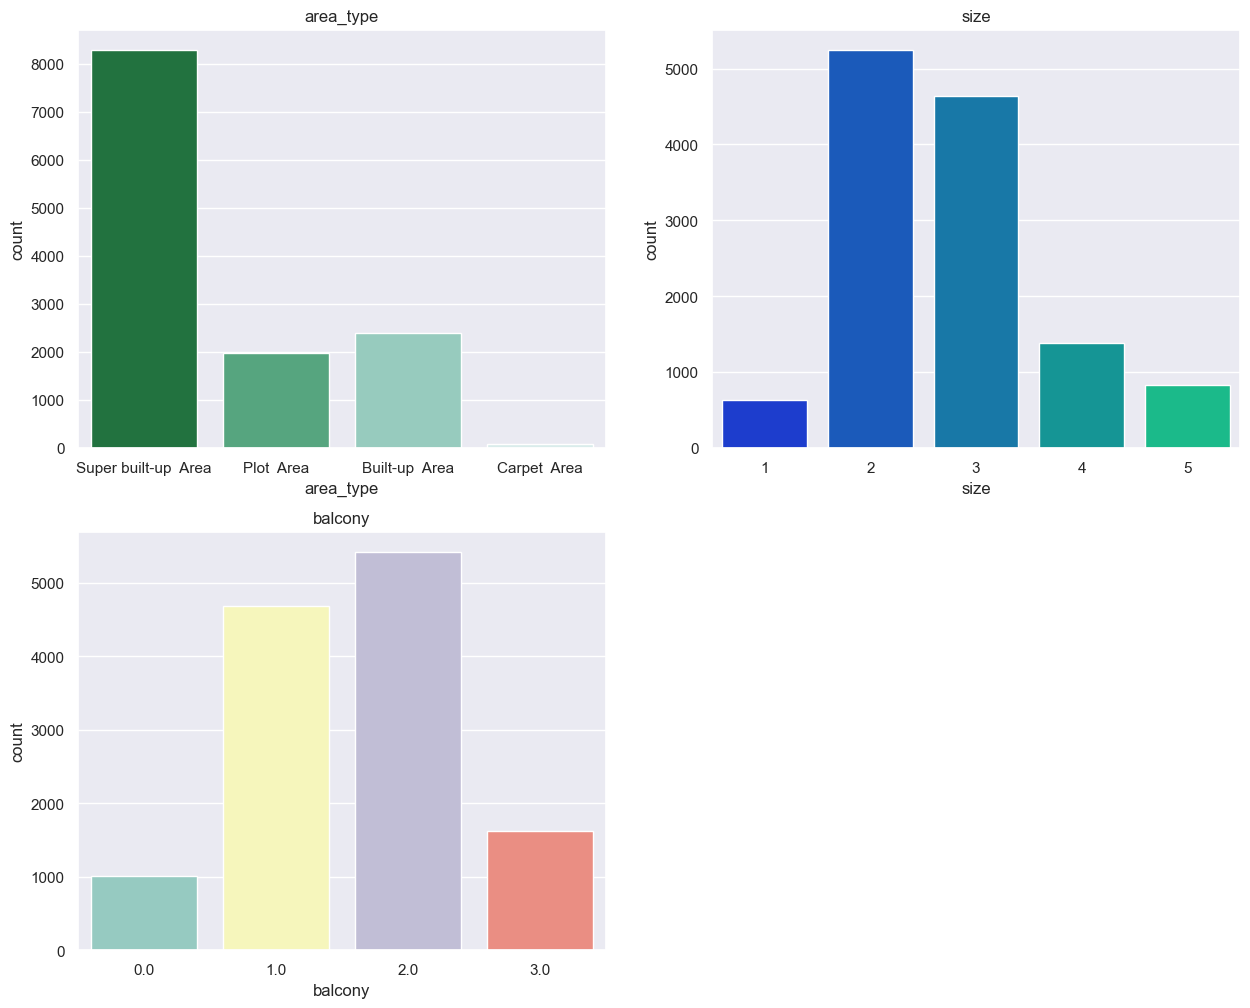

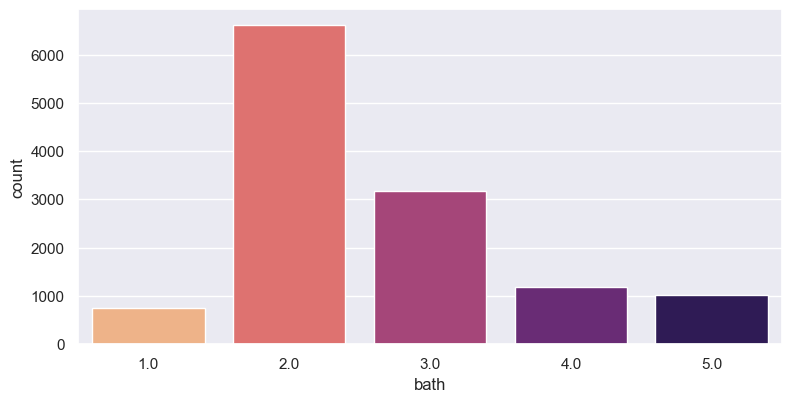

In [84]:
plt.figure(figsize = (15,25))
palette = [ 'BuGn_r',  'winter',  'Set3']

for index, value in enumerate ([ 'area_type','size', 'balcony', 'bath']):
    if value not in ['bath','availability']:
        plt.subplot(4,2,index+1)
        sns.countplot(data = hs_df, x= value, palette = palette[index] )
        plt.title(value)
    elif value == 'bath':
        plt.figure(figsize = (20,20))
        plt.subplot(4,2,5)
        sns.countplot(data = hs_df, x= value, palette = 'magma_r' )
    else:
        plt.figure(figsize = (20,20))
        plt.subplot(4,2,7)
        sns.countplot(data = hs_df, x= value, palette = 'mako_r' )
        plt.xticks(rotation = 90)
        
plt.show()

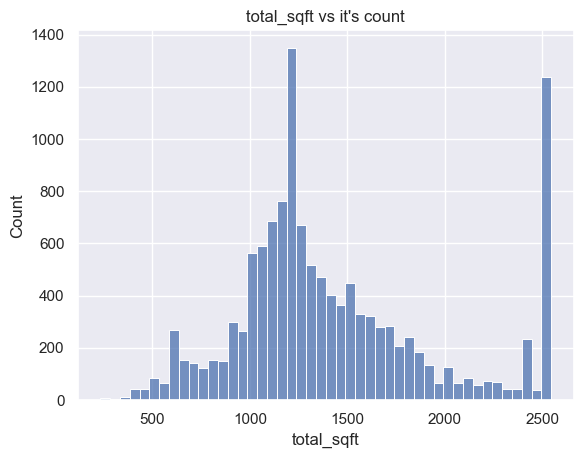

In [85]:
sns.histplot(data = hs_df, x ='total_sqft')
plt.title("total_sqft vs it's count")
plt.show()

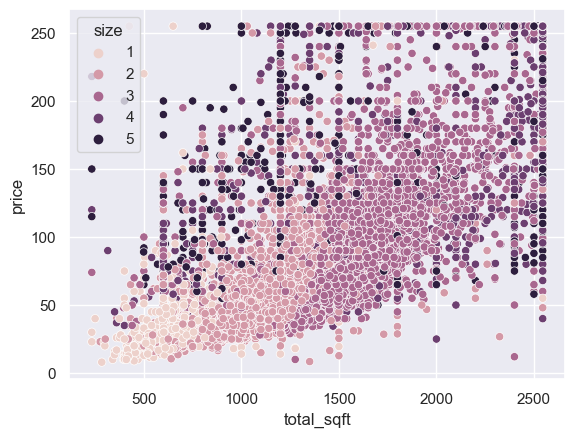

In [86]:
sns.scatterplot(data = hs_df, x='total_sqft', y='price', hue = 'size')
plt.show()

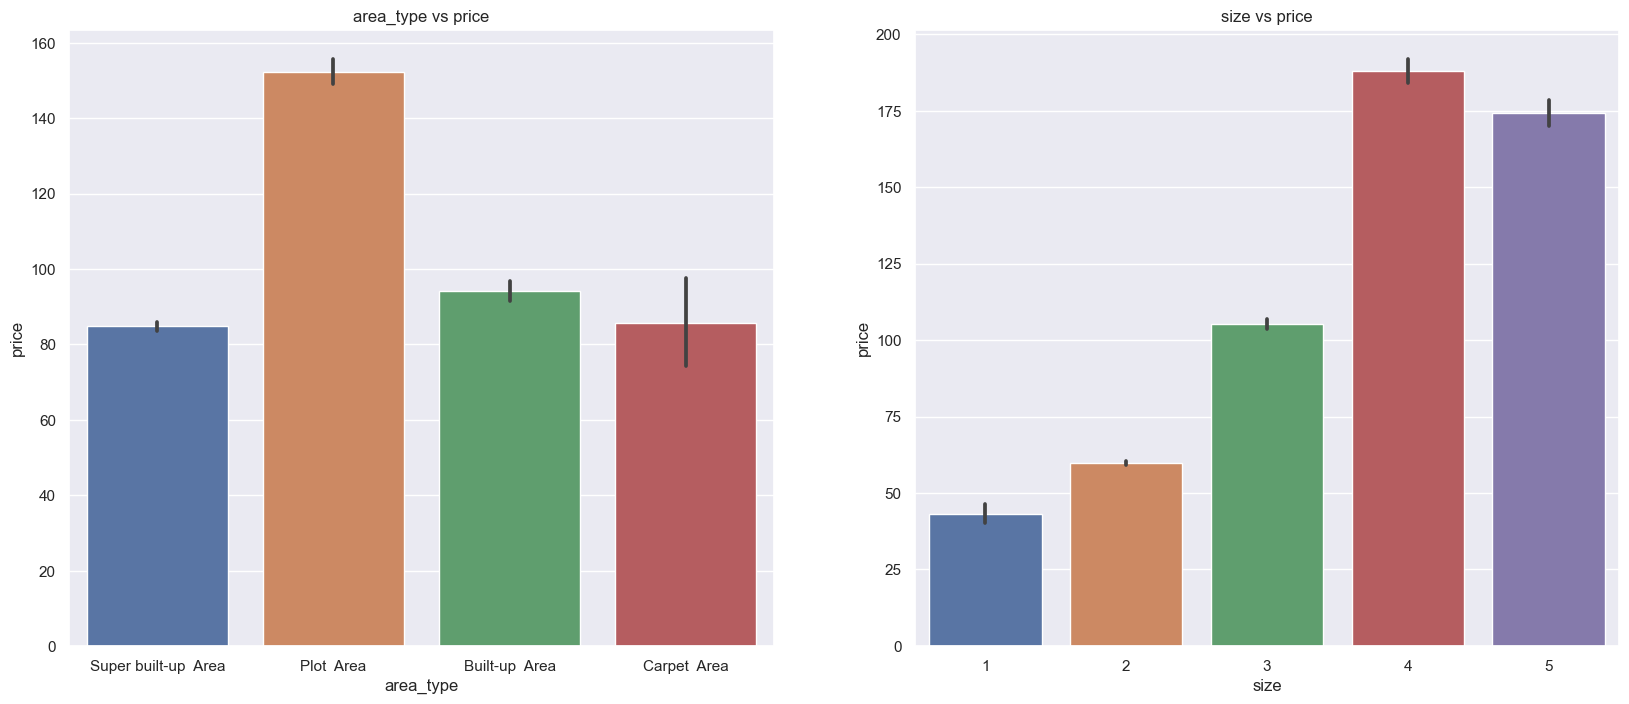

In [87]:
plt.figure(figsize = (20,8), dpi =100)
for index, value in enumerate(['area_type','size']):
    plt.subplot(1,2,index+1)
    sns.barplot(data = hs_df, x = value, y='price')
    plt.title(f'{value} vs price')
    
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

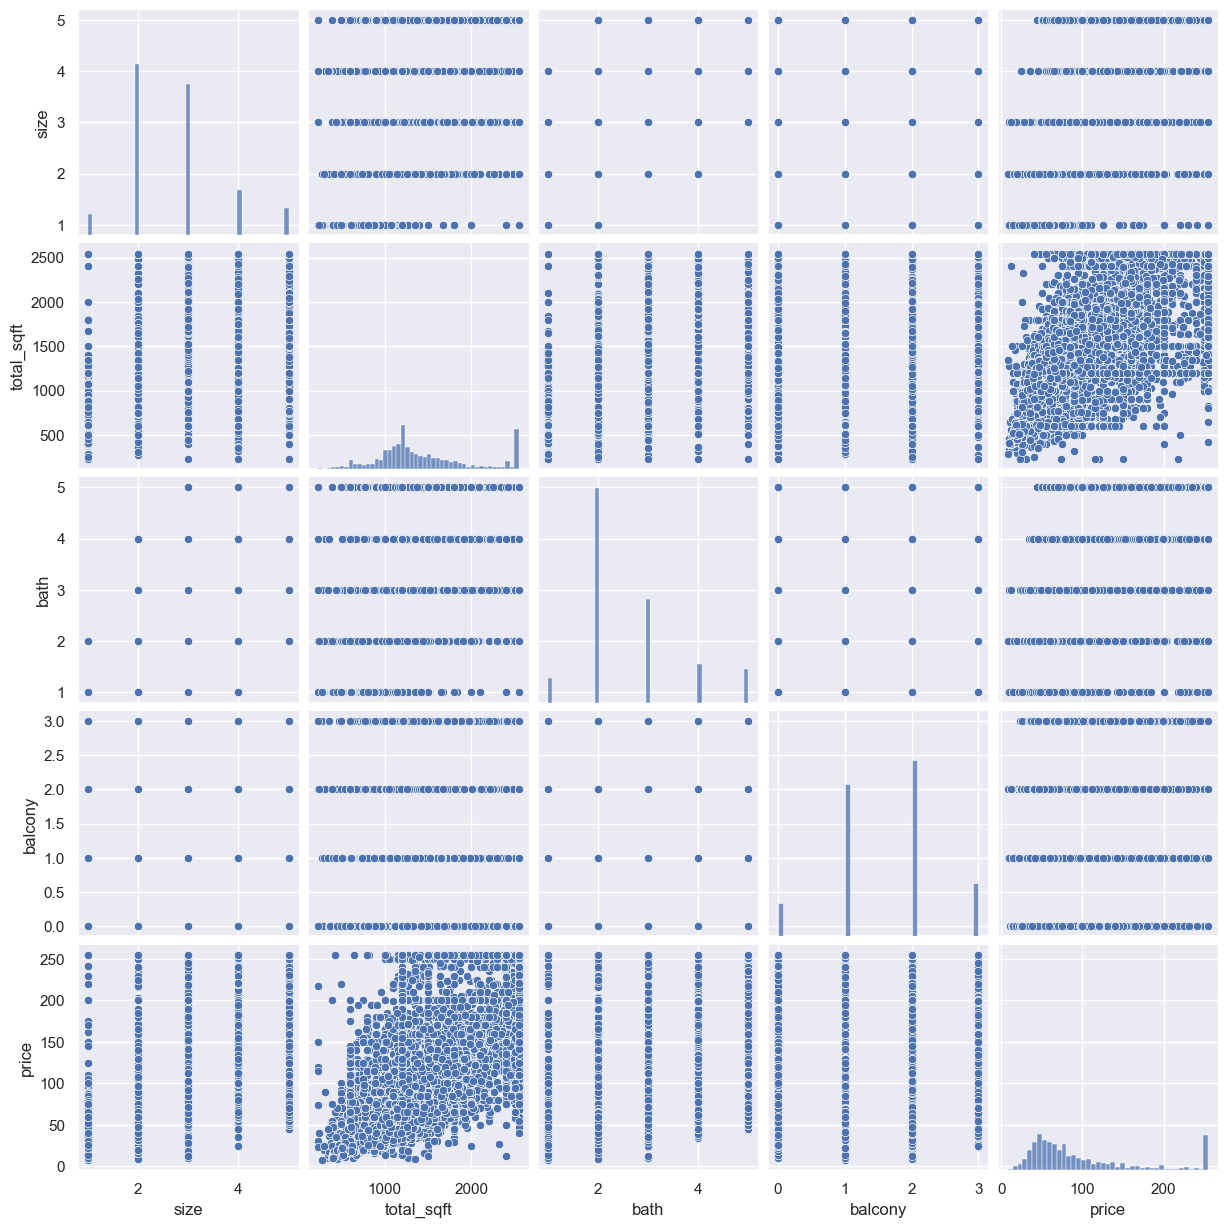

In [88]:
sns.pairplot(data= hs_df)
plt.show

## CORRELATION

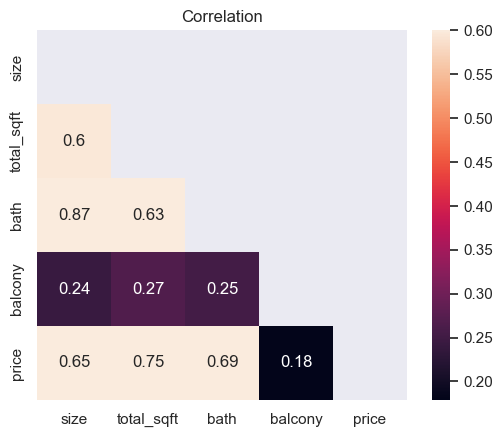

In [89]:
corr = hs_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, annot = True, vmax=.6, square=True)
plt.title('Correlation')
plt.show()

## ENCODING

In [90]:
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12750 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12750 non-null  object 
 1   availability  12750 non-null  object 
 2   location      12750 non-null  object 
 3   size          12750 non-null  int32  
 4   society       7462 non-null   object 
 5   total_sqft    12750 non-null  float64
 6   bath          12750 non-null  float64
 7   balcony       12750 non-null  float64
 8   price         12750 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1.4+ MB


In [91]:
print('Columns before Encoding:',len(hs_df.columns))
# size, bath, availability,society
# Encoding
hs_df = pd.get_dummies(data = hs_df, columns = ['area_type','location'], drop_first = True)
print('Columns after Encoding:', len(hs_df.columns))

Columns before Encoding: 9
Columns after Encoding: 234


## DEPENDENT & INDEPENDENT VARIABLE

In [92]:
# Dependent & independent variables
X = hs_df.drop(columns = ['price','bath', 'size','society','availability'], axis=1)
y = hs_df['price']

## FEATURE SCALING

In [93]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc_x = sc.fit_transform(X)

## AUTOCORRELATION

In [94]:
import statsmodels.api as sm
#from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

# OLS Model
ols_model = smf.OLS(endog = y, exog=X).fit()
residuals = ols_model.resid
durbin_watson_value = sm.stats.stattools.durbin_watson(residuals)
print('durbin_watson:',durbin_watson_value)

durbin_watson: 1.9947897885943249


In [95]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              607.8
Date:                Sun, 18 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:44:12   Log-Likelihood:                         -62949.
No. Observations:               12750   AIC:                                  1.264e+05
Df Residuals:                   12521   BIC:                                  1.281e+05
Df Model:                         229                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
total_sqft                               0.0845      0.001    133.244      0.000       0.083       0.086
balcony                                  0.2335      0.404      0.578      0.563      -0.558       1.025
area_type_Carpet  Area                   9.1576      3.781      2.422      0.015       1.746      16.569
area_type_Plot  Area                    51.9670      1.067     48.687      0.000      49.875      54.059
area_type_Super built-up  Area          -4.4649      0.817     -5.463      0.000      -6.067      -2.863
location_aecs layout                   -43.1004      9.896     -4.355      0.000     -62.498     -23.703
location_akshaya nagar                 -42.3186      4.526     -9.351      0.000     -51.190     -33.448
location_ambalipura                    -24.4071      6.785     -3.597      0.000     -37.707     -11.107
location_ambedkar nagar                -24.6186      6.501     -3.787      0.000     -37.361     -11.876
location_amruthahalli                  -30.0180      7.024     -4.274      0.000     -43.785     -16.251
location_anandapura                    -61.7815      6.626     -9.323      0.000     -74.770     -48.793
location_ananth nagar                  -47.4021      6.399     -7.408      0.000     -59.945     -34.859
location_anekal                        -59.0955      6.183     -9.558      0.000     -71.215     -46.976
location_anjanapura                    -51.0220      8.566     -5.956      0.000     -67.813     -34.231
location_ardendale                     -36.0204      7.234     -4.979      0.000     -50.201     -21.840
location_arekere                       -21.8022      8.336     -2.616      0.009     -38.141      -5.463
location_attibele                      -45.6881      5.382     -8.489      0.000     -56.238     -35.138
location_babusapalaya                  -52.8289      6.895     -7.662      0.000     -66.344     -39.314
location_badavala nagar                -27.2788     13.952     -1.955      0.051     -54.627       0.069
location_balagere                      -19.9630      5.224     -3.821      0.000     -30.203      -9.723
location_banashankari                  -22.0846      2.966     -7.446      0.000     -27.899     -16.271
location_banaswadi                     -21.7598      8.339     -2.609      0.009     -38.105      -5.414
location_banjara layout                -60.0658     10.332     -5.814      0.000     -80.318     -39.814
location_bannerghatta                  -22.9685      8.121     -2.828      0.005     -38.888      -7.049
location_bannerghatta road             -35.5788      3.020    -11.782      0.000     -41.498     -29.660
location_basavangudi                    21.9

## TRAIN AND TEST SPLIT

In [96]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sc_x, y, test_size = 0.25, random_state = 111 )

In [97]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9562, 229) (9562,) (3188, 229) (3188,)


## MODEL BUILDING

### 1. Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Linear Regression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

# Prediction
y_lr_pred_train = lr_model.predict(X_train)
y_lr_pred_test = lr_model.predict(X_test)

# Mean Squared Error
print("Train Mean Squared Error:", mean_squared_error(y_train, y_lr_pred_train))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_lr_pred_test), '\n')

# Root Mean Squared Error
print("Train Root Mean Squared Error:", np.sqrt(mean_squared_error(y_train, y_lr_pred_train)))
print("Test Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_lr_pred_test)), '\n')

# r2_score 
print('Train r2_score: ',r2_score(y_train, y_lr_pred_train))  
print('Test r2_score: ',r2_score(y_test, y_lr_pred_test))

Train Mean Squared Error: 1124.5764891685847
Test Mean Squared Error: 1181.6857225906601 

Train Root Mean Squared Error: 33.53470574149391
Test Root Mean Squared Error: 34.37565595869641 

Train r2_score:  0.7415139624786127
Test r2_score:  0.7353980918966136


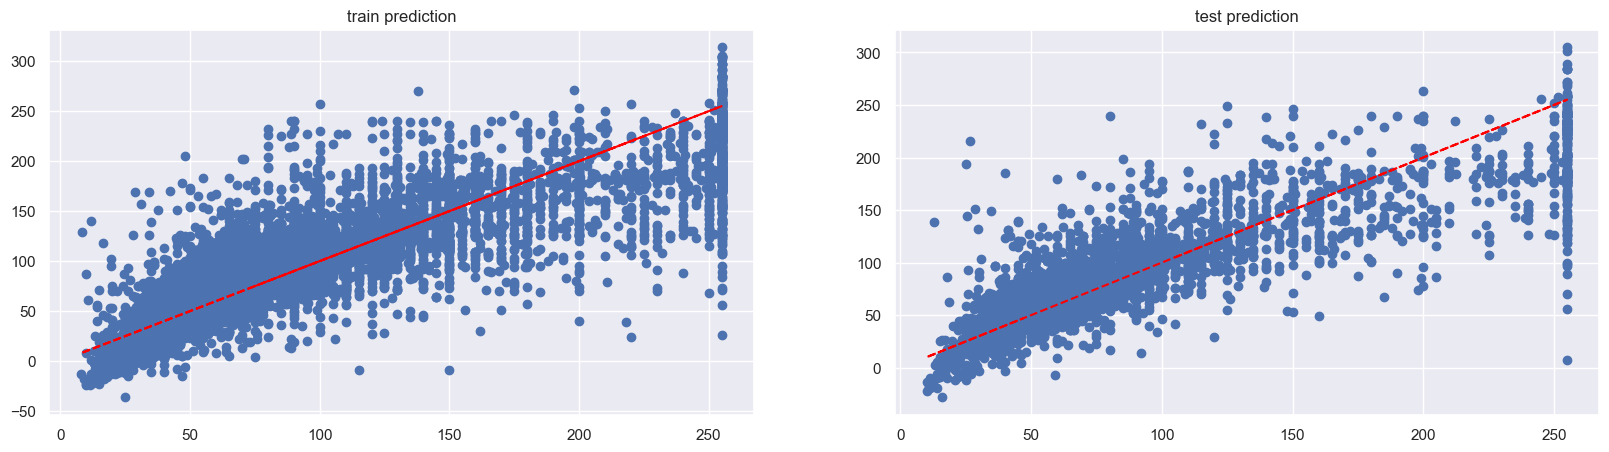

In [99]:
# linearity
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(y_train, y_lr_pred_train)
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('train prediction')

plt.subplot(1,2,2)
plt.scatter(y_test, y_lr_pred_test)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('test prediction')

plt.show()

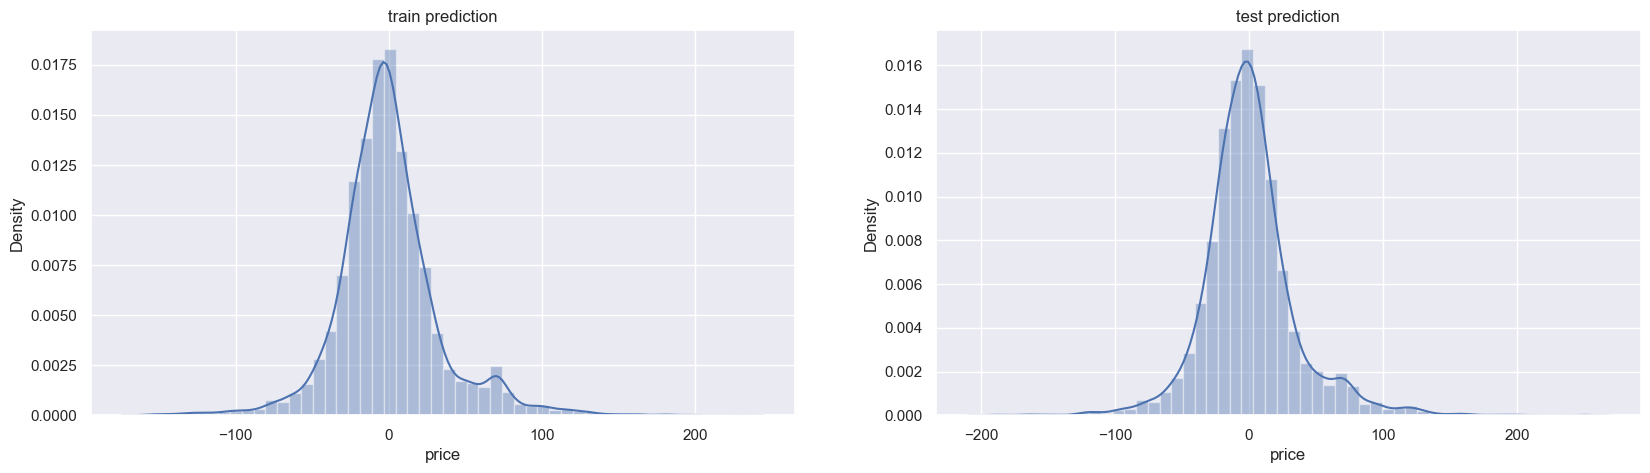

In [100]:
# Normality of Residual

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot((y_train - y_lr_pred_train), bins=50)
plt.title('train prediction')

plt.subplot(1,2,2)
sns.distplot((y_test - y_lr_pred_test), bins=50)
plt.title('test prediction')

plt.show()

Text(0.5, 1.0, 'test prediction')

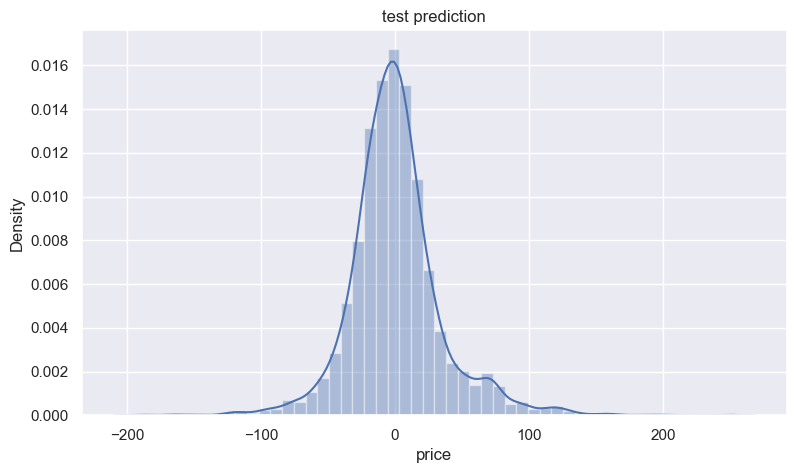

In [101]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,2)
sns.distplot((y_test - y_lr_pred_test), bins=50)
plt.title('test prediction')


### 2. Xgboost

In [102]:
import xgboost as xgb


# XGBoost regressor
xg = xgb.XGBRegressor(max_depth =4)
xg_model = xg.fit(X_train, y_train)


# Prediction
y_xg_train_pred = xg_model.predict(X_train)
y_xg_test_pred = xg_model.predict(X_test)


# mean squared error
print("Train Mean Squared Error:", mean_squared_error(y_train, y_xg_train_pred))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_xg_test_pred), '\n')

# Root Mean Squared Error
print("Train Root Mean Squared Error:", np.sqrt(mean_squared_error(y_train, y_xg_train_pred)))
print("Test Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_xg_test_pred)), '\n')

# R2-score
print('Train r2_score: ',r2_score(y_train, y_xg_train_pred))
print('Test r2_score: ',r2_score(y_test, y_xg_test_pred))

Train Mean Squared Error: 834.5911547562249
Test Mean Squared Error: 1053.4634656351388 

Train Root Mean Squared Error: 28.889291350883372
Test Root Mean Squared Error: 32.45710192908693 

Train r2_score:  0.8081676412221388
Test r2_score:  0.7641094939243644


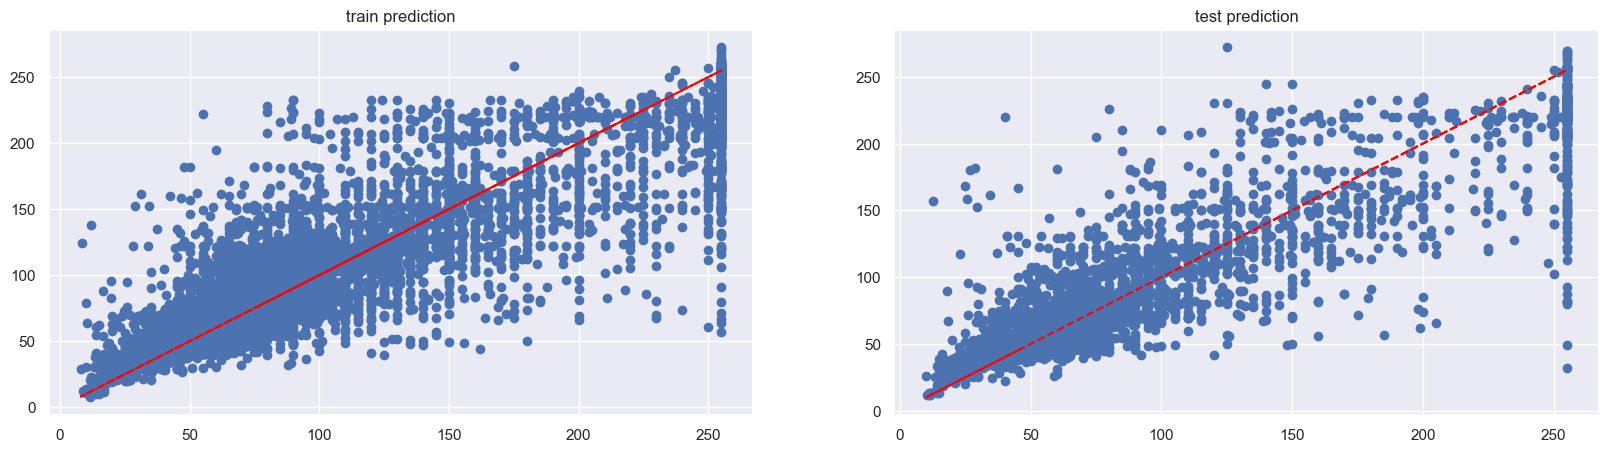

In [103]:
# linearity
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(y_train, y_xg_train_pred)
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('train prediction')

plt.subplot(1,2,2)
plt.scatter(y_test, y_xg_test_pred)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('test prediction')

plt.show()

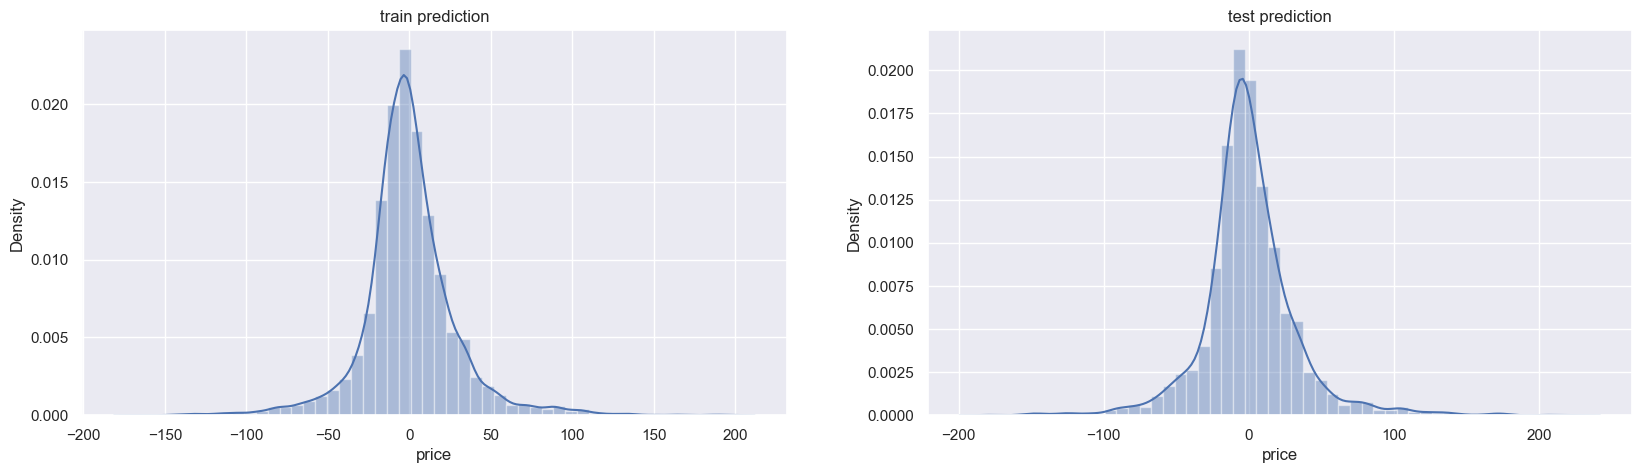

In [104]:
# Normality of Residual

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot((y_train - y_xg_train_pred), bins=50)
plt.title('train prediction')

plt.subplot(1,2,2)
sns.distplot((y_test - y_xg_test_pred), bins=50)
plt.title('test prediction')

plt.show()

## CONCLUSION

In [105]:
result = {'Linear Regression':[1124.57, 1181.68, 33.53, 34.37, 0.74,0.73], 'Xgboost':[834.59,1053.46,28.88, 32.457,0.80,0.76]}
results_df = pd.DataFrame(result, index=['Train MSE', 'Test MSE','Train RMSE','Test RMSE', 'Train R2_score','Test R2_score'])
results_df.T

,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2_score,Test R2_score
Linear Regression,1124.57,1181.68,33.53,34.370,0.74,0.73
Xgboost,834.59,1053.46,28.88,32.457,0.80,0.76


* The two models have been implemented for this dataset: one is a 'Linear Regression' model and the other is an 'XGBoost' model.
* For Linear Regression, the train R2 score is 0.74, and the test R2 score is 0.73. 
* For XGBoost, the train R2 score is 0.80, and the test R2 score is 0.76.
* If we compare the results, XGBoost is providing the best results.
* The train and test outputs exhibit a linear relationship with their predictions
* The residuals of the train and test data are normally distributed. 
* There is no residual autocorrelation; the Durbin-Watson value is approximately 1.99, close to 2. 
* The following independent variables exhibit correlations: 'bath' and 'size', 'total_sqft' and 'size', and 'bath' and 'total_sqft’. 
* The variable 'total_sqft' is highly correlated with the dependent variable 'price'.

